This Notebook contains use cases of pennylane - a python framework developed by Xanadu which is more focused on QML and Hybrid models" <br> 
- start by installing pennylane using the command "pip install pennylane"



Some resources to start with pennylane: 
- https://pennylane.ai/codebook

In [8]:
# Quantum Functions
from pennylane import numpy as np
import pennylane as qml

# In PennyLane all wires are intialized in the state |0>
def my_first_quantum_function(theta):
    qml.RX(theta, wires = 0) # applies a rotation around the X axis of the bloch sphere of angle theta to the qubit 0 this changes the amplitude of the qubit 0, preparing it into superposition depending on theta.
    qml.PauliY(wires = 1)   # applies a Pauli Y gate to the qubit 1
    qml.Hadamard(wires = 0) # Hadmard gate creates a condition of superposition in both wires
    qml.Hadamard(wires = 1) # Hadmard gate to qubit 1 
    # qml.draw('mpl') # This is a drawing function that visualizes the quantum circuit
    return qml.state() # Returns a complex np array that represents the quantum state after all the gates have been applied

Here, the above code will do nothing, the reason is we need a "device" on which this quantum circuit will run. Some devices we can use are: <br>

- `default.qubit`: Vanilla qubit quantum device, for circuits without noise, it is not optimized.but it will be the first one which will be updgraded and will have the most advanced feature at any point of the time. <br>

- `lightining.qubit`:  A fast noiseless qubit device. It is optimized for performance via a C++ backend, but its development will often lag a bit behind default.qubit. (highly recommended for for large circuits) <br>

- `default.mixed`: A qubit device that allows noisy gates. It works with the density operator representation of quantum states.   


In [ ]:
# in default.qubit the numbers of wires argument is optional, since the backend can read our circuit and determine the number of wires automatically.
dev = qml.device("default.qubit", wires = 2)
# now here the decorator @qml.qnode is used to convert the function into a quantum node, which can be executed on the quantum device.
@qml.qnode(dev) # this creates the beneath function eligible to talk to a quantum device, how to run quantum gates, and how to retunr quantum results ( like measurement of state vectors).
def my_first_quantum_function(theta): 
    qml.RX(theta, wires = 0)
    qml.PauliY(wires = 1)
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)

    return qml.state()

In [12]:
print(my_first_quantum_function(np.pi/4))  # This will print the quantum state after applying the gates with theta = 0.5

[ 0.19134172+0.46193977j -0.19134172-0.46193977j -0.19134172+0.46193977j
  0.19134172-0.46193977j]


The list above represents the amplitudes of the state in the computational basis {|00>, |01>, |10>,|11>} , in this order. Therefore the output state |Ψ> is: <br>
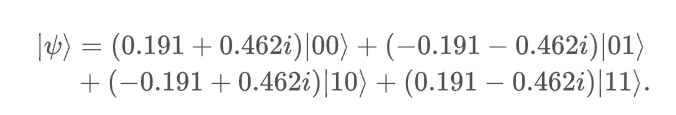 <br>

in general , states will be expressed in computational basis in this 'binary counting' order.

In [14]:
# using custom wiring 
dev = qml.device("default.qubit", wires= 3)  # default way of creating a device with 3 wires (default labeling) 
# or
dev = qml.device("default.qubit", wires = [0,1,2])
# or
dev = qml.device("default.qubit", wires = range(3)) 
# or 
# we can change the order of the wires by specifying the the array explicitly
dev_scrambled = qml.device("default.qubit", wires = [2,0,1])  # this will create a device with wires labeled 2,0,1
